<a href="https://colab.research.google.com/github/divyaj150-dot/Deep-Learning-Projects/blob/main/CNN_cifar10_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.callbacks import Callback

In [3]:
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
from tensorflow.keras.datasets import cifar10

# Load the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 21s 0us/step


array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]], dtype=uint8)
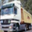

In [ ]:
x_train[1]

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [6]:
# Assuming x_train, y_train are loaded and contain CIFAR-10 data
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

<function matplotlib.pyplot.subplots_adjust(left: 'float | None' = None, bottom: 'float | None' = None, right: 'float | None' = None, top: 'float | None' = None, wspace: 'float | None' = None, hspace: 'float | None' = None) -> 'None'>

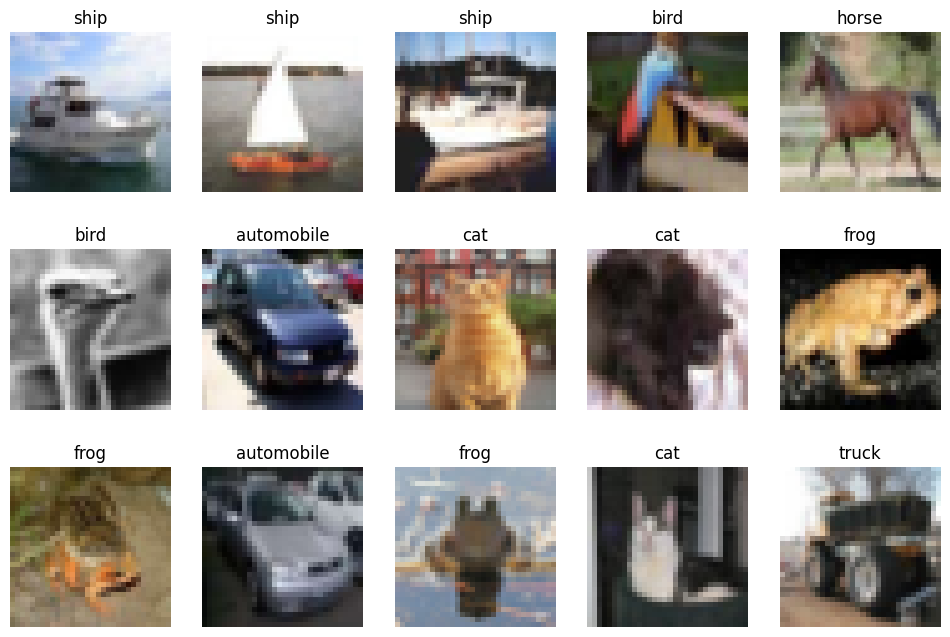

In [7]:
fig,axes = plt.subplots(3,5,figsize=(12,8))

axes=axes.ravel()

for i in range(15):
  index=np.random.randint(0,len(X_train))
  axes[i].imshow(X_train[index])
  axes[i].set_title(class_names[y_train[index][0]])
  axes[i].axis('off')

plt.subplots_adjust

/tmp/ipython-input-11-2691736325.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(class_names, rotation = 90)


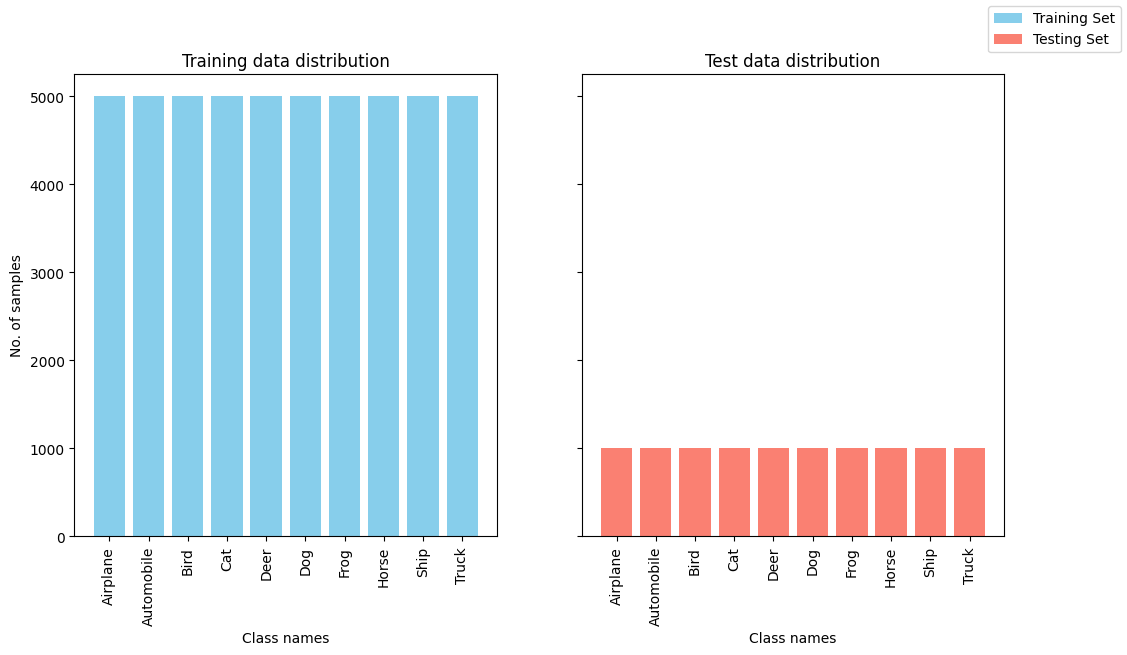

In [ ]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


train_classes , train_counts = np.unique(y_train,return_counts=True)
test_classes , test_counts = np.unique(y_test,return_counts=True)

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot training set distribution
axs[0].bar(class_names, train_counts, color='skyblue')
axs[0].set_title('Training data distribution')
axs[0].set_xlabel('Class names')
axs[0].set_ylabel('No. of samples')
axs[0].set_xticklabels(class_names, rotation = 90)
# Plot testing set distribution
axs[1].bar(class_names, test_counts, color='salmon')
axs[1].set_title('Test data distribution')
axs[1].set_xlabel('Class names')

# Add a legend to clarify the colors represent training and testing sets
fig.legend(['Training Set', 'Testing Set'])

# plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [ ]:
''' things to test
1. Create imbalanced dataset and work upon it

'''

In [8]:
from sklearn.model_selection import train_test_split

y_cat_train = to_categorical(y_train, 10)    # Convert the labels from 0-9 to one hot encoded 10-dimensional vectors
y_cat_test = to_categorical(y_test, 10)      # Convert the labels from 0-9 to one hot encoded 10-dimensional vectors

x_train1, x_valid, y_train1, y_valid= train_test_split(X_train, y_cat_train, test_size=0.2, random_state=22)


# Data augementation: Create a data augmentation function for the training and validation sets. During each iteration of training,
# the function will be applied randomly to batch of images to create diverse scenarios throughout the training

train_datagen = ImageDataGenerator(    #standard augmentation
                    rotation_range=20,
                    rescale=1./255,
                    zoom_range=0.1,
                    fill_mode='nearest',
                    horizontal_flip=True
                    )

valid_datagen = ImageDataGenerator(    #standard augmentation
                    rotation_range=20,
                    rescale=1./255,
                    zoom_range=0.1,
                    fill_mode='nearest',
                    horizontal_flip=True
                    )

test_datagen = ImageDataGenerator(rescale=1./255)

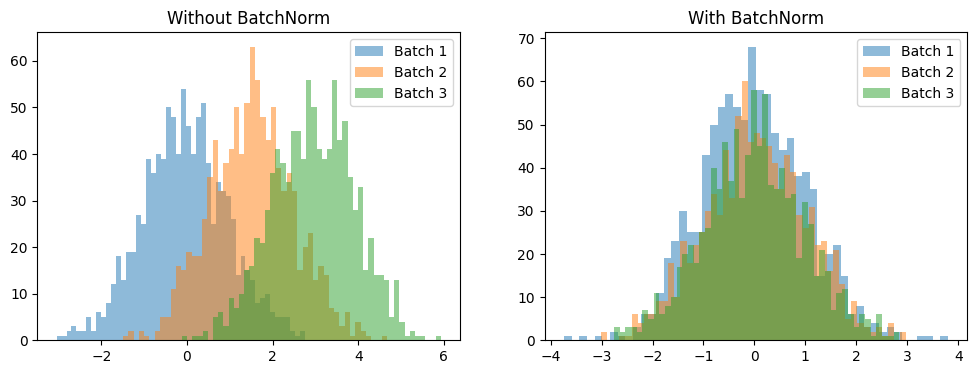

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Simulate shifting activation distributions (without BatchNorm)
for i in range(3):
    shift = i * 1.5
    data = np.random.normal(loc=shift, scale=1.0, size=1000)
    axs[0].hist(data, bins=50, alpha=0.5, label=f'Batch {i+1}')
axs[0].set_title('Without BatchNorm')
axs[0].legend()

# Simulate normalized distributions (with BatchNorm)
for i in range(3):
    data = np.random.normal(loc=0.0, scale=1.0, size=1000)
    axs[1].hist(data, bins=50, alpha=0.5, label=f'Batch {i+1}')
axs[1].set_title('With BatchNorm')
axs[1].legend()

plt.show()

In [9]:
num_classes=10

# Create the model
model = Sequential()                  # A keras sequential object allows adding layers on top of one another

model.add(
    Conv2D(
        filters=32,                    # Number of output filters/channels
        kernel_size=(3, 3),            # Size of the convolution window
        strides=1,                     # Step size of the convolution
        padding='same',                # Padding strategy (same means output size will be made same as input size)
        input_shape=(32, 32, 3),       # Input dimensions (height, width, channels)
        kernel_initializer='he_normal',# Weight initialization method (other options: https://keras.io/api/layers/initializers/)
        activation='relu'              # Activation function (other options: https://keras.io/api/layers/activations/)
    )
)


model.add(BatchNormalization())      # Normalize activations for faster training
model.add(Dropout(0.2))              # Randomly drop 20% neurons to prevent overfitting

# Second Convolutional Layer in First Block
model.add(
    Conv2D(
        filters=64,                    # Number of output filters/channels
        kernel_size=(3, 3),            # Size of the convolution window
        strides=1,                     # Step size of the convolution
        padding='same',                # Padding strategy
        kernel_initializer='he_normal', # Weight initialization method
        activation='relu'              # Activation function
    )
)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))              # Reduce spatial dimensions by half (16x16) # default is 2*2

# Second Convolutional Block - Doubled filters (64)
model.add(Conv2D(128,
                 (5,5),
                 strides=1,
                 padding='same',
                 kernel_initializer='he_normal',
                 activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Second Convolutional Layer in Second Block
model.add(Conv2D(256,
                 (3, 3),
                 strides=1,
                 padding='same',
                 kernel_initializer='he_normal',
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())  # Further reduce spatial dimensions (8x8)


# Global Average Pooling to replace Flatten
# Reduces parameters and maintains spatial information
model.add(GlobalAveragePooling2D())

# Final Dropout before classification
model.add(Dropout(0.2))

# Output layer with softmax activation for 10-class classification
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
class LrHistory(Callback):
    def on_train_begin(self, logs=None):
        self.lrs = []

    def on_epoch_end(self, epoch, logs=None):
        # Get current learning rate from optimizer
        lr = float(self.model.optimizer.learning_rate)
        # If using learning rate schedules wrapped in a TensorFlow variable, use:
        # lr = float(self.model.optimizer.lr.numpy())
        self.lrs.append(lr)

# Initialize the callback
lr_history = LrHistory()

In [11]:
#Compile the model
#Only after compilation, the weights are initialized and other hyper-parameters are considered for training to start

optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',factor=0.5,min_lr=0.00001,patience=5,verbose=1,mode='max')

history= model.fit(train_datagen.flow(x_train1,y_train1,batch_size=32),
                   validation_data= valid_datagen.flow(x_valid,y_valid,batch_size=32),
                   epochs=50,
                   callbacks=[reduce_lr, lr_history])

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.3584 - loss: 1.8219 - val_accuracy: 0.5052 - val_loss: 1.3926 - learning_rate: 0.0100
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - accuracy: 0.5747 - loss: 1.1989 - val_accuracy: 0.6288 - val_loss: 1.0465 - learning_rate: 0.0100
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.6379 - loss: 1.0254 - val_accuracy: 0.6343 - val_loss: 1.0171 - learning_rate: 0.0100
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - accuracy: 0.6764 - loss: 0.9287 - val_accuracy: 0.6438 - val_loss: 1.0035 - learning_rate: 0.0100
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.7015 - loss: 0.8582 - val_accuracy: 0.6692 - val_loss: 0.9699 - learning_rate: 0.0100
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - accuracy: 0.7175 - loss: 0.8222 - val_accuracy: 0.6601 - val_loss: 0.9691 - learning_rate: 0.0100
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - accuracy: 0.7273 

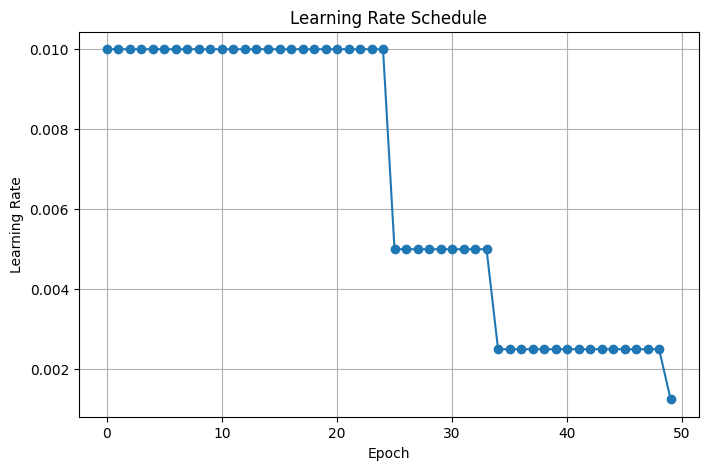

In [12]:
plt.figure(figsize=(8,5))
plt.plot(lr_history.lrs, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.grid(True)
plt.show()

In [14]:
num_classes=10

# Create the model
model1 = Sequential()                  # A keras sequential object allows adding layers on top of one another

model1.add(
    Conv2D(
        filters=32,                    # Number of output filters/channels
        kernel_size=(9, 9),            # Size of the convolution window
        strides=2,                     # Step size of the convolution
        padding='same',                # Padding strategy (same means output size will be made same as input size)
        input_shape=(32, 32, 3),       # Input dimensions (height, width, channels)
        kernel_initializer='he_normal',# Weight initialization method (other options: https://keras.io/api/layers/initializers/)
        activation='relu'              # Activation function (other options: https://keras.io/api/layers/activations/)
    )
)


model1.add(BatchNormalization())      # Normalize activations for faster training
model1.add(Dropout(0.2))              # Randomly drop 20% neurons to prevent overfitting

# Second Convolutional Layer in First Block
model1.add(
    Conv2D(
        filters=64,                    # Number of output filters/channels
        kernel_size=(3, 3),            # Size of the convolution window
        strides=1,                     # Step size of the convolution
        padding='same',                # Padding strategy
        kernel_initializer='he_normal', # Weight initialization method
        activation='relu'              # Activation function
    )
)
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2)))              # Reduce spatial dimensions by half (16x16) # default is 2*2

# Second Convolutional Block - Doubled filters (64)
model1.add(Conv2D(128,
                 (5,5),
                 strides=1,
                 padding='same',
                 kernel_initializer='he_normal',
                 activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

# Second Convolutional Layer in Second Block
model1.add(Conv2D(256,
                 (3, 3),
                 strides=1,
                 padding='same',
                 kernel_initializer='he_normal',
                 activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D())  # Further reduce spatial dimensions (8x8)


# Global Average Pooling to replace Flatten
# Reduces parameters and maintains spatial information
model1.add(GlobalAveragePooling2D())

# Final Dropout before classification
model1.add(Dropout(0.2))

# Output layer with softmax activation for 10-class classification
model1.add(Dense(num_classes, activation='softmax'))

In [15]:
class LrHistory(Callback):
    def on_train_begin(self, logs=None):
        self.lrs = []

    def on_epoch_end(self, epoch, logs=None):
        # Get current learning rate from optimizer
        lr = float(self.model.optimizer.learning_rate)
        # If using learning rate schedules wrapped in a TensorFlow variable, use:
        # lr = float(self.model.optimizer.lr.numpy())
        self.lrs.append(lr)

# Initialize the callback
lr_history1 = LrHistory()

In [16]:
#Compile the model
#Only after compilation, the weights are initialized and other hyper-parameters are considered for training to start

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.01)
model1.compile(loss='categorical_crossentropy', optimizer=optimizer1, metrics=['accuracy'])

reduce_lr1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',factor=0.5,min_lr=0.00001,patience=5,verbose=1,mode='max')

history= model1.fit(train_datagen.flow(x_train1,y_train1,batch_size=32),
                   validation_data= valid_datagen.flow(x_valid,y_valid,batch_size=32),
                   epochs=50,
                   callbacks=[reduce_lr1, lr_history1])

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.3269 - loss: 1.9486 - val_accuracy: 0.4426 - val_loss: 1.5041 - learning_rate: 0.0100
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.5099 - loss: 1.3552 - val_accuracy: 0.5545 - val_loss: 1.2480 - learning_rate: 0.0100
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.5713 - loss: 1.1999 - val_accuracy: 0.5914 - val_loss: 1.2019 - learning_rate: 0.0100
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.6127 - loss: 1.0957 - val_accuracy: 0.6136 - val_loss: 1.1060 - learning_rate: 0.0100
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - accuracy: 0.6359 - loss: 1.0294 - val_accuracy: 0.6238 - val_loss: 1.0612 - learning_rate: 0.0100
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.6506 - loss: 1.0007 - val_accuracy: 0.6584 - val_loss: 0.9732 - learning_rate: 0.0100
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.6647 